In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### 3 задание
В файле test_3 лежит результат теста рассылки email, целевая метрика - конверсия в переход на сайт с этого email. 


Изучите результаты теста и сделайте вывод , увеличилась конверсия или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

In [3]:
data = pd.read_csv('test_3.csv')

In [4]:
data.head()

,group,client_id,click_flg
0,test,1,1
1,test,2,0
2,test,3,0
3,test,4,1
4,test,5,1


In [5]:
data.shape

(20033, 3)

In [6]:
data.dtypes

group        object
client_id     int64
click_flg     int64
dtype: object

In [7]:
data.group.describe()

count     20033
unique        2
top        test
freq      10023
Name: group, dtype: object

##  Эффективное сравнение конверсий/долей. Критерий Хи-квадрат Пирсона

Критерий Хи-квадарт позволяет нам сравнить отношения количества успеха к неуспехам в двух таблицах.Под успешным можем подразумевать не только совершение действия, но и любое желаемое число, например можем сравнить доли успешно закрытых заказов, доли женщин студентов от всей группы и так далее. Позволяет сравнивать больше чем два значения и довольно таки эффективно.

Суть <span class="burk">теста</span> - сравнить конверсии в успешный переход на сайт

Н0: Конверсии не имеют значимого различия

Н1: Есть значимосе различие между конверсиями

Выдвигается нулевая гипотеза о том, что наблюдаемые конверсии в переход на сайт соответствуют ожидаемым (т.е. между ними нет разницы, т.к. они взяты из той же генеральной совокупности).  Если этот так, то разброс будет относительно небольшим, в пределах случайных колебаний. Меру разброса определяют по статистике Хи-квадрат. 

![xi](https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_517/https://statanaliz.info/wp-content/uploads/2017/02/chi_sqr_01_02.png)

![xi](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Chi-square_distributionPDF.png/488px-Chi-square_distributionPDF.png)

Критерий хи-квадарт вычисляем по формуле:

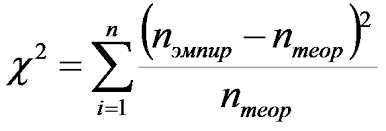

Значение Xи-квадрат используется для оценки меры рассогласованности наблюдаемого и ожидаемого результата. Если, согласно нулевой гипотезе, ожидаемый результат будет сильно отличаться от наблюдаемых значений, значит стоит поставить под сомнение справедливость гипотезы.

<span class="mark">Эмпимрические значения</span> - это те значения, которые мы получили на практике (В нашем случае это наши реальные конверсии в переход на сайт)

<span class="mark">Теоретические значения</span> -  это те конверсии, которые бы мы получили, если бы была верна нулевая гипотеза об отсутствии значимого различия, то есть они должны быть равны.

Если сравниваем 2 группы, то нужно не забыть про **поправку Йетса**:

При использовании критерия Хи-квадрат Пирсона мы считаем, что дискретная вероятность наблюдаемых биномиальных частот в таблице может быть приближена непрерывным распределением хи-квадрат. Это предположение не совсем правильно, и вводит некоторую погрешность.

Для того, чтобы уменьшить погрешность в приближении Франк Йейтс, английский статистик, предложил поправку на непрерывность, которая регулирует формулу для хи-квадрат тест Пирсона путем вычитания 0,5 из разницы между каждой наблюдаемой величиной и его ожидаемого значения в таблице 2 × 2 на случай чрезвычайных ситуаций. Это уменьшает хи-квадрат значение,  и тем самым увеличивает ее p-value

Подробнее - https://ru.qwe.wiki/wiki/Yates's_correction_for_continuity

$\chi^2_Y = \sum_{}\frac{(|f_o - f_e| - 0.5)^2}{f_e}.$

o - Наблюдаемые частоты

е - Ожидаемые

Если мы сравниваем больше 2-х значений, то есть таблица сопряженности не 2на2, то вводить поправку Йетса не нужно. Эта формула в основном используется, когда хотя бы одна ячейка таблицы имеет ожидаемое количество меньше 5.

***Составляем таблицу сопряженности***

<span class="mark">Таблица сопряжённости</span>, или таблица контингентности, факторная таблица в статистике — средство представления совместного распределения двух переменных, предназначенное для исследования связи между ними. 

Таблица сопряжённости является наиболее универсальным средством изучения статистических связей, так как в ней могут быть представлены переменные с любым уровнем измерения. Таблицы сопряжённости часто используются для проверки гипотезы о наличии связи между двумя признаками с использованием точного теста Фишера или критерия согласия Пирсона.

Подробнее о структуре таких таблиц - https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8

In [8]:
table = pd.crosstab(
    data['group'],
    data['click_flg'],
    margins = True
)
table

table1 = pd.crosstab(
    data['group'],
    data['click_flg']
)
table

click_flg,0,1,All
group,,,
control,6883,3127,10010
test,7061,2962,10023
All,13944,6089,20033



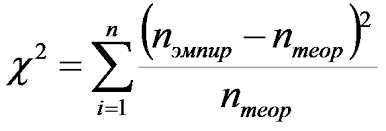

In [36]:
def Chisq(table):
    expected = []
    obs1 = np.append(table.iloc[0][0:2].values, table.iloc[1][0:2].values) #[189, 189, 186, 190]
    rows = table.iloc[0:2,2].values #[378, 376]
    cols = table.iloc[2,0:2].values #[375, 379]
    total = table.loc['All','All'] #754
    for count in range(2):
        for column in cols:
            expected.append((rows[count]*column)/total) # Ожидаемые частоты column/total - доля купивших во всей выборке
    obs = obs1 + 0.5 * np.sign(expected - obs1) 
    return sum(((obs - expected)**2)/expected)

**Число степеней свободы:** (rows - 1) * (cols - 1)
* в нашем случае: (2-1) * (2-1) = 1 * 1 = 1


In [37]:
Chisq(table)

6.65548520025077

In [38]:
1 - stats.chi2.cdf(Chisq(table), 1)

0.009885105063293764

In [39]:
p_val =  1 - stats.chi2.cdf(Chisq(table), 1)

if p_val > 0.05:
    print('Не можем отвергнуть нулевую гипотезу о том, что доли не имеют значимого различия', 
          '\nХи-квадрат критерий =', Chisq(table), '\np-value =', round(p_value, 4))
else:
    print('Не можем принять нулевую гипотезу о том, что доли не имеют значимого различия',
          '\nХи-квадрат критерий =', Chisq(table), '\np-value =', round(p_value, 4))

Не можем принять нулевую гипотезу о том, что доли не имеют значимого различия 
Хи-квадрат критерий = 6.65548520025077 
p-value = 0.0099


Также воспользуемся библиотекой scipy для расчета Хи-квадрат критерия и p-value

In [40]:
# Статистика теста, p_value, Степени свободы, Ожидаемые частоты, основанные на предельных суммах таблицы.
stat, p_val, df, ef = stats.chi2_contingency(table1)

if p_val > 0.05:
    print('Не можем отвергнуть нулевую гипотезу о том, что доли не имеют значимого различия', 
          '\nХи-квадрат критерий =', stat, '\np-value =', round(p_value, 4))
else:
    print('Не можем принять нулевую гипотезу о том, что доли не имеют значимого различия',
          '\nХи-квадрат критерий =', stat, '\np-value =', round(p_value, 4))

Не можем принять нулевую гипотезу о том, что доли не имеют значимого различия 
Хи-квадрат критерий = 6.65548520025077 
p-value = 0.0099
